In [1]:
## This notebook is an investigation of different data sets/data types with regards to 
## Monitoring Living Shorelines

In [169]:
## Importing Libraries 
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


In [154]:
# Read a shapefile of NYC's shoreline. This data set was retrieved from (Insert Link)

local_path = "/Users/kenneth/Documents/Living_Shorelines/data/nyc_gov_shoreline/nyc_shoreline.shp" #This is where the copy of the remote repository was cloned onto the local computer(varies from user to user)

nyc_shoreline = gpd.read_file(local_path) # reading the data and storing it as a geopandas dataframe 

In [155]:
# creating a simple plot of the geopandas dataframe 
nyc_shoreline.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   feat_code   489 non-null    float64 
 1   shape_leng  489 non-null    float64 
 2   source_id   489 non-null    float64 
 3   status      489 non-null    object  
 4   sub_code    489 non-null    float64 
 5   geometry    489 non-null    geometry
dtypes: float64(4), geometry(1), object(1)
memory usage: 23.0+ KB


In [156]:
nyc_shoreline.head(1)

,feat_code,shape_leng,source_id,status,sub_code,geometry
0,3900.0,482.569042,2.139000e+10,Unchanged,390000.0,"LINESTRING (-73.99730 40.70118, -73.99733 40.70119, -73.99742 40.70122, -73.99751 40.70125, -73...."


In [86]:
##importing data from census to look at census tracts 
## https://www.nyc.gov/site/planning/data-maps/open-data.page#census
file_path = "/Users/kenneth/Documents/Living_Shorelines/data/census_tracts_2020/nyct2020.shp"
nyc_census_tracts = gpd.read_file(file_path)

In [87]:
## cleaning data, selecting only columns of interest and converting data types to 
## the desired types 
nyc_census_tracts = nyc_census_tracts[['BoroName','GEOID','geometry']]
nyc_census_tracts['GEO_ID'] = nyc_census_tracts['GEOID'].astype(int)

<AxesSubplot:>

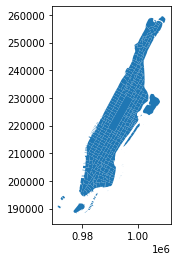

In [88]:
## creating a mask that marks the row as true if the value in the boro name column is manhattan
##applying the mask onto the entire dataframe-- this will select only the manhattan rows
##plotting the census tracts 
mask = nyc_census_tracts['BoroName'] == 'Manhattan'
manhattan = nyc_census_tracts.loc[mask]
manhattan.plot()

In [13]:
## Importing data from American Community Survey for Per Capita Income(future work, left on 07/10/23)
## https://www.nyc.gov/site/planning/data-maps/open-data/districts-download-metadata.page

In [58]:
## Importing poverty/POPULATION data from American Community Survey(Census tract data 2021)
file_path = "/Users/kenneth/Documents/Living_Shorelines/data/census_tracts_2020/socioeconomic_data/2021_B17001.csv"
nyc_poverty = pd.read_csv(file_path, low_memory=False)

In [59]:
## cleaning the data so that we only have GEO_ID, poverty, and population data columns
## Dropping first row of data as it is metadata/extra titles 

nyc_poverty = nyc_poverty[['GEO_ID','B17001_001E','B17001_002E']] # selecting on columns of interest
nyc_poverty = nyc_poverty.iloc[1: , :] # dropping first row 
nyc_poverty['B17001_001E'] = nyc_poverty['B17001_001E'].astype(int) # turning column into intergers 
nyc_poverty['B17001_002E'] = nyc_poverty['B17001_002E'].astype(int) # turning column into intergers 
nyc_poverty['GEO_ID'] = nyc_poverty['GEO_ID'].apply(lambda x: x[9:]) #dropping country code from GEOID
nyc_poverty['GEO_ID'] = nyc_poverty['GEO_ID'].astype(int) # turning column into intergers 

nyc_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 1 to 2327
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   GEO_ID       2327 non-null   int64
 1   B17001_001E  2327 non-null   int64
 2   B17001_002E  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [165]:
nyc_poverty.head()

,GEO_ID,B17001_001E,B17001_002E,percent_poverty
1,36005000100,0,0,NaN
2,36005000200,4453,1014,22.771166
3,36005000400,6000,240,4.000000
4,36005001600,5826,951,16.323378
5,36005001901,2164,596,27.541590


In [81]:
## lets create a poverty ratio index(ie what percentage of the population is living 
## in poverty)

nyc_poverty['percent_poverty'] = (nyc_poverty['B17001_002E'] / nyc_poverty['B17001_001E']) * 100

In [91]:
## merging the poverty dataframe with the census tract geodataframe
## this will allow us to access the poverty data geospatially 
nyc_poverty_gpd =  pd.merge(
    left = nyc_census_tracts,
    right = nyc_poverty,
    how="inner",
    on='GEO_ID')

<AxesSubplot:>

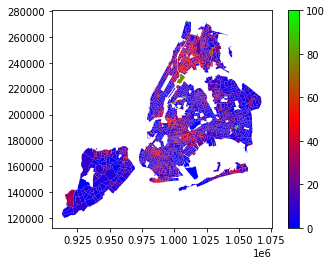

In [149]:
nyc_poverty_gpd.plot("percent_poverty", cmap="brg", legend = True) 

In [160]:
def boro_plotter(gpd, boro):
    mask2 = gpd['BoroName'].eq(boro)
    boro_to_be_plotted = gpd.loc[mask2]
    boro_to_be_plotted.plot("percent_poverty", cmap="brg", legend=True)

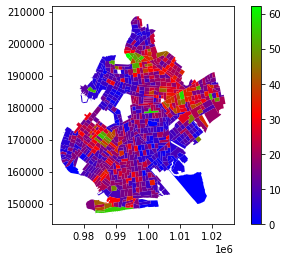

In [164]:
boro_plotter(gpd=nyc_poverty_gpd, boro = 'Brooklyn')

In [185]:
##importing data from census to look at census tracts 
## https://www.nyc.gov/site/planning/data-maps/open-data.page#census
file_path = "/Users/kenneth/Downloads/wastewater_treatment_plants/wastewater_treatment_plants.shp"
test = gpd.read_file(file_path)

In [187]:
test 

,drainage_a,dry_weathe,item_id,wpcp,population,demand,geometry
0,12947,120,OWLS HEAD,OH,"800,000",64,POINT (-74.03458 40.64181)
1,3200,60,RED HOOK,RH,"200,000",16,POINT (-73.97849 40.70228)
2,15087,110,CONEY ISLAND,CI,"600,000",48,POINT (-73.93358 40.59023)
3,10779,40,OAKWOOD BEACH,OB,"250,000",20,POINT (-74.11880 40.55088)
4,0,NaN,SPRING CREEK AUXILIARY PLANT,NaN,NaN,NaN,POINT (-73.86380 40.65880)
5,9665,60,PORT RICHMOND,PR,"200,000",16,POINT (-74.12547 40.63974)
6,6030,170,NORTH RIVER,NR,"600,000",48,POINT (-73.95608 40.82714)
7,12056,275,WARDS ISLAND,WI,"1,100,000",88,POINT (-73.92396 40.78672)
8,16664,200,HUNTS POINT,HP,"700,000",56,POINT (-73.88314 40.80299)
9,6259,45,ROCKAWAY,ROC,"100,000",8,POINT (-73.82953 40.58347)
